In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Q1. What is the most frequent genre in the database?

# Q2. What genre has highest votes?

# Q3. What movie got the lowest popularity? what's its genre?The united states, thread has the lowest rate in our dataset and it has genres of music, drama, war, sci-fi, and hist.

# Q4. Which year has the most filmmed movies?


In [9]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')

•	Exploration summary

•	We have data frame consisting of 9827 rows and 9 columns. 

•	Our database looks a bit tidy with no NANS nor duplicated values.

•	Released_Date column needs to be casted into date time and to extract only the year values. 

•	Overviews, Original_language and Poster-Url won’t be so useful during analysis. Se we’ll drop them.

•	There is a noticeable outliners in popularity column

•	Vote_Average better be categorised for proper analysis.

•	Genre column had comma separated values and white spaces that needs to be handled and casted into category.  

In [11]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [12]:
df.info

<bound method DataFrame.info of      Release_Date                                 Title  \
0      2021-12-15               Spider-Man: No Way Home   
1      2022-03-01                            The Batman   
2      2022-02-25                               No Exit   
3      2021-11-24                               Encanto   
4      2021-12-22                        The King's Man   
...           ...                                   ...   
9822   1973-10-15                              Badlands   
9823   2020-10-01                      Violent Delights   
9824   2016-05-06                          The Offering   
9825   2021-03-31  The United States vs. Billie Holiday   
9826   1984-09-23                               Threads   

                                               Overview  Popularity  \
0     Peter Parker is unmasked and no longer able to...    5083.954   
1     In his second year of fighting crime, Batman u...    3827.658   
2     Stranded at a rest stop in the mountains

In [13]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [14]:
df.duplicated().sum()

0

In [15]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [16]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [17]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

print(df['Release_Date'].dtypes)

datetime64[ns]


In [18]:
df['Release_Date'] = df['Release_Date'].dt.year

df['Release_Date'].dtypes

dtype('int32')

In [19]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the columns:

In [21]:
cols = ['Overview','Original_Language','Poster_Url']

In [22]:
df.drop(cols, axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [23]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


Catagorizing Vote_Average column:

We would cu the Vote_Average values and make 4 categoies: popular, average, below_average, not popular to describe it more using catigorize_col() function provided above. 

In [25]:
def catigorize_col(df, col, labels):

    edges = [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]

    
    df[col] = pd.cut(df[col], edges, labels = labels, duplicates = 'drop')
    return df

In [26]:
labels = ['Not_popular','Below_average','Average','Popular']

catigorize_col(df,'Vote_Average',labels)

df['Vote_Average'].unique()

['Popular', 'Below_average', 'Average', 'Not_popular', NaN]
Categories (4, object): ['Not_popular' < 'Below_average' < 'Average' < 'Popular']

In [27]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


In [28]:
df['Vote_Average'].value_counts()

Vote_Average
Not_popular      2467
Popular          2450
Average          2412
Below_average    2398
Name: count, dtype: int64

In [29]:
df.dropna(inplace = True)

df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [30]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,Below_average,Thriller
3,2021,Encanto,2402.201,5076,Popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,Average,"Action, Adventure, Thriller, War"


# We would split the Genre into a list and then explode our dataframe to have only one genre per row for each movie.

In [32]:
df['Genre'] = df['Genre'].str.split(', ')

df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [33]:
#Casting cloumn into category

df['Genre'] = df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [34]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [35]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


# Data Visualization

In [37]:
sns.set_style('whitegrid')

# What is the most frequent genre of movies released on Amazon Prime?


In [39]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

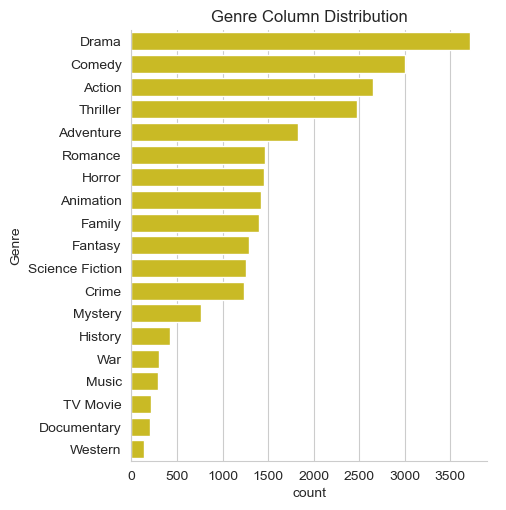

In [40]:
sns.catplot(y = 'Genre', data = df, kind = 'count',
            order = df['Genre'].value_counts().index,
            color = "#E4D00A")
plt.title("Genre Column Distribution")
plt.show()

# Which has highest votes in vote avg column?

In [47]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


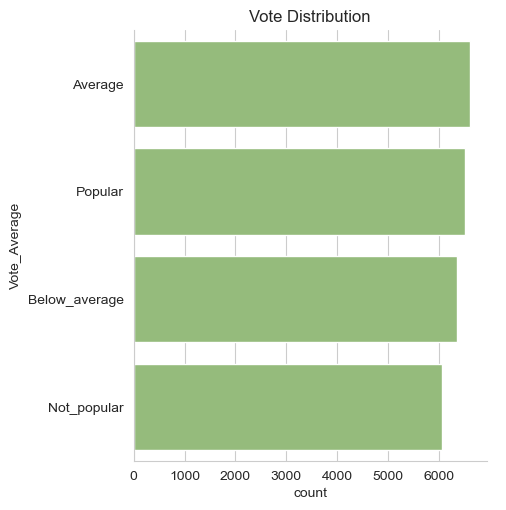

In [50]:
sns.catplot(y = 'Vote_Average', data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index,
            color = "#93C572")
plt.title("Vote Distribution")
plt.show()

# What movie got the highest popularity? what's its genre?

In [55]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure


In [76]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


# What movie got the lowest Popularity? what's its genre?

In [79]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1984,Threads,13.354,186,Popular,War
25550,1984,Threads,13.354,186,Popular,Drama
25551,1984,Threads,13.354,186,Popular,Science Fiction


# Which year has the most filmmed movie?

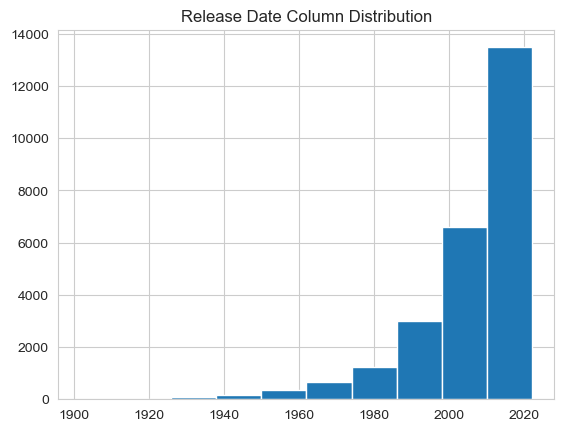

In [82]:
df['Release_Date'].hist()


plt.title("Release Date Column Distribution")
plt.show()

conclusion:

Q1. What is the most frequent genre in the database?
Drama genre is the most frequent genre in our database and has appeared more than 14% of the time among 19 other genres.

Q2. What genre has highest votes?
We have 25.5% of our dataset with popularity rate in our dataset and it has genre of Action, Adventure and Science friction.

Q3. What movie got the lowest popularity? what's its genre?
The united states, thread has the lowest rate in our dataset and it has genres of music, drama, war, sci-fi, and hist.

Q4. Which year has the most filmmed movies?
year 2020 has the highest filmming rate in our dataset.